In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.Part 1: Minimum-Tracking-Error Frontier

Let the market return be the target return. Estimate the expected deviation from market return, for the ten industry portfolios:
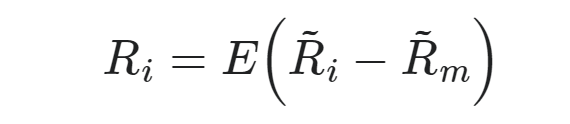

In [2]:
df_market_portfolio = pd.read_excel("Market_Portfolio.xlsx", index_col="Date")
df_market_portfolio.head()

E:\software\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


Market
Date          
200401    2.22
200402    1.46
200403   -1.23
200404   -1.75
200405    1.23

In [3]:
df_industry_portfolios = pd.read_excel("Industry_Portfolios.xlsx", index_col="Date")
df_industry_portfolios.head()

E:\software\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth  Utils  Other
Date                                                                       
200401   0.06  -1.07  -0.62   0.44   4.53   1.41   0.45  3.09   1.92   2.88
200402   4.25  -0.07   1.95   4.69  -2.92  -0.52   6.09  0.89   2.07   2.16
200403  -0.09  -1.15  -0.27  -0.13  -2.55  -2.07   0.29 -3.96   1.13  -0.63
200404   1.42   2.30  -0.17   2.52  -4.91  -0.48  -2.70  3.54  -3.55  -3.76
200405  -1.89  -1.64   1.61   0.39   4.85  -2.95   0.30 -0.42   1.28   1.86

In [4]:
df = pd.merge(df_industry_portfolios, df_market_portfolio, right_index=True, left_index=True, how = "inner")
df.head()

NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth  Utils  Other  \
Date                                                                          
200401   0.06  -1.07  -0.62   0.44   4.53   1.41   0.45  3.09   1.92   2.88   
200402   4.25  -0.07   1.95   4.69  -2.92  -0.52   6.09  0.89   2.07   2.16   
200403  -0.09  -1.15  -0.27  -0.13  -2.55  -2.07   0.29 -3.96   1.13  -0.63   
200404   1.42   2.30  -0.17   2.52  -4.91  -0.48  -2.70  3.54  -3.55  -3.76   
200405  -1.89  -1.64   1.61   0.39   4.85  -2.95   0.30 -0.42   1.28   1.86   

        Market  
Date            
200401    2.22  
200402    1.46  
200403   -1.23  
200404   -1.75  
200405    1.23

In [5]:
lst_industry_names = list(df_industry_portfolios.columns)
df1 = df.copy()

lst_excess_names = []
for name in lst_industry_names:
    col = name + "-Rm"
    lst_excess_names.append(col)
    df1[col] = df1[name] - df1["Market"]
df1.head()
#lst_excess_names

NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth  Utils  Other  \
Date                                                                          
200401   0.06  -1.07  -0.62   0.44   4.53   1.41   0.45  3.09   1.92   2.88   
200402   4.25  -0.07   1.95   4.69  -2.92  -0.52   6.09  0.89   2.07   2.16   
200403  -0.09  -1.15  -0.27  -0.13  -2.55  -2.07   0.29 -3.96   1.13  -0.63   
200404   1.42   2.30  -0.17   2.52  -4.91  -0.48  -2.70  3.54  -3.55  -3.76   
200405  -1.89  -1.64   1.61   0.39   4.85  -2.95   0.30 -0.42   1.28   1.86   

        ...  NoDur-Rm  Durbl-Rm  Manuf-Rm  Enrgy-Rm  HiTec-Rm  Telcm-Rm  \
Date    ...                                                               
200401  ...     -2.16     -3.29     -2.84     -1.78      2.31     -0.81   
200402  ...      2.79     -1.53      0.49      3.23     -4.38     -1.98   
200403  ...      1.14      0.08      0.96      1.10     -1.32     -0.84   
200404  ...      3.17      4.05      1.58      4.27     -3.16      1.27   
200405  ...     -3.12     -2.87      0.38     -0.84      3.62     -4.18   

        Shops-Rm  Hlth-Rm  Utils-Rm  Other-Rm  
Date                                           
200401     -1.77     0.87     -0.30      0.66  
200402      4.63    -0.57      0.61      0.70  
200403      1.52    -2.73      2.36      0.60  
200404     -0.95     5.29     -1.80     -2.01  
200405     -0.93    -1.65      0.05      0.63  

[5 rows x 21 columns]

In [6]:
#Ri = E(Ri-Rm)
se_excess_returns = df1[lst_excess_names].apply(np.mean)
se_excess_returns

NoDur-Rm    0.154750
Durbl-Rm   -0.014750
Manuf-Rm    0.264750
Enrgy-Rm    0.483083
HiTec-Rm    0.018167
Telcm-Rm    0.133333
Shops-Rm    0.168250
Hlth-Rm     0.035750
Utils-Rm    0.159083
Other-Rm   -0.259000
dtype: float64


Also estimate the covariance matrix of return deviations, for the ten industry portfolios:
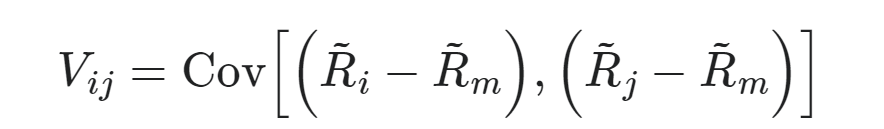

In [7]:
df_covs = df1[lst_excess_names].cov()
df_covs.head()

NoDur-Rm   Durbl-Rm  Manuf-Rm   Enrgy-Rm  HiTec-Rm  Telcm-Rm  \
NoDur-Rm  5.439696  -6.073035 -1.396192  -1.200533 -1.883151  1.538885   
Durbl-Rm -6.073035  26.628901  4.908024  -3.481055  1.891577 -1.707625   
Manuf-Rm -1.396192   4.908024  2.950499   1.666133  0.065267 -0.626416   
Enrgy-Rm -1.200533  -3.481055  1.666133  19.274911 -1.516972 -1.040525   
HiTec-Rm -1.883151   1.891577  0.065267  -1.516972  5.098746 -0.773294   

          Shops-Rm   Hlth-Rm  Utils-Rm  Other-Rm  
NoDur-Rm  1.140741  3.815137  4.272002 -1.768738  
Durbl-Rm -0.354335 -8.082946 -9.617490  4.385865  
Manuf-Rm -1.154597 -2.288900 -1.901412  0.358904  
Enrgy-Rm -3.710439 -2.485796  4.454368 -3.864826  
HiTec-Rm -0.245350 -1.936284 -2.342839 -1.404050

## 1.1.Plot the minimum-tracking-error frontier generated by the ten industry portfolios.

This graph must have expected (monthly) return deviation on the vertical axis vs (monthly) tracking error on the horizontal axis.

This graph must cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less).


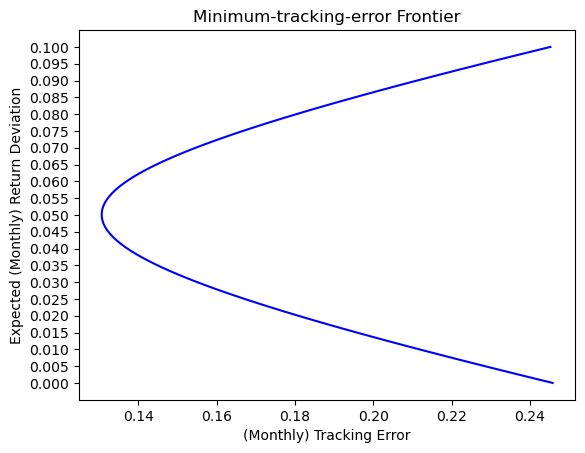

In [33]:
V = df_covs.copy()
V_inv = pd.DataFrame(np.linalg.inv(V), columns=V.columns, index=V.index)

R = se_excess_returns
e = pd.Series([1]*10)
e.index = R.index

alpha = R.dot(V_inv).dot(e)
zeta = R.dot(V_inv).dot(R)
delta = e.dot(V_inv).dot(e)

R_mv = alpha/delta

#from 0% to 0.1% on the vertical axis
R_p = np.linspace(0, 0.1, 100) 

sigma_p = np.sqrt(1/delta + delta/(zeta*delta-alpha**2)*(R_p-R_mv)**2)

plt.plot(sigma_p, R_p, color='blue', linestyle='-')

plt.yticks(np.arange(0, 0.105, 0.005))
#plt.yticks(np.arange(0, 2.1, 0.1))
plt.xlabel('(Monthly) Tracking Error')
plt.ylabel('Expected (Monthly) Return Deviation')
plt.title('Minimum-tracking-error Frontier')
plt.show() 

## 1.2.Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier.

In [34]:
#plot the line starting from the origin
R_f = 0
#R_p = np.linspace(0, 0.1, 100) 
R_p_riskless = np.linspace(0, 0.1, 100) 

#R_p = R_mv + np.sqrt((sigma_p**2-1/delta)*(zeta*delta-alpha**2)/delta)
sigma_p_riskless = (R_p_riskless-R_f)/np.sqrt(zeta - 2*alpha*R_f + delta*(R_f**2))

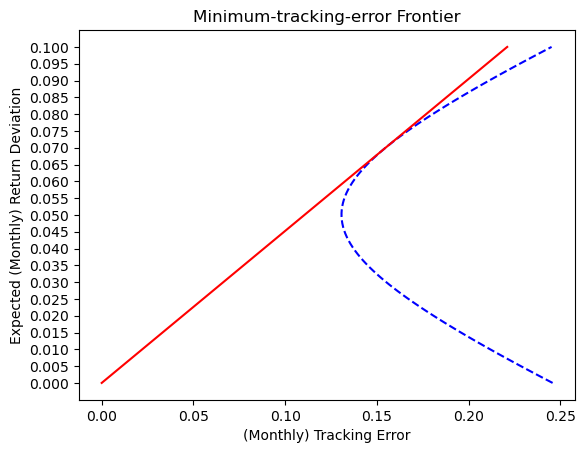

In [35]:
plt.plot(sigma_p, R_p, color='blue', linestyle='--')
plt.plot(sigma_p_riskless, R_p_riskless, color='red', linestyle='-')

plt.yticks(np.arange(0, 0.105, 0.005))
plt.xlabel('(Monthly) Tracking Error')
plt.ylabel('Expected (Monthly) Return Deviation')
plt.title('Minimum-tracking-error Frontier')
plt.show() 

## 1.3.Calculate the information ratio and portfolio weights for the "tangency" portfolio.

In [10]:
np.sqrt(zeta - 2*alpha*R_f + delta*R_f**2)

0.4524875396199334

In [11]:
R_tg = (alpha*R_f - zeta)/(delta*R_f - alpha)
R_tg
a = (zeta*V_inv.dot(e)-alpha*V_inv.dot(R))/(zeta*delta-alpha**2)
b = (delta*V_inv.dot(R) - alpha*V_inv.dot(e))/(zeta*delta-alpha**2)
w_star = a + b*R_tg

w_star

NoDur-Rm    0.052634
Durbl-Rm    0.000153
Manuf-Rm    0.137627
Enrgy-Rm    0.087032
HiTec-Rm    0.179353
Telcm-Rm    0.071074
Shops-Rm    0.106884
Hlth-Rm     0.102776
Utils-Rm    0.040162
Other-Rm    0.222304
dtype: float64

# 2.Part 2: Minimum-Variance Frontier w/o Short Sales

Use the monthly returns of the ten industry portfolios to generate the minimum-variance frontier without short sales, using Monte Carlo simulation. Portfolio weights will be limited to the range [0, 1].

Randomly draw each element of w, the 10 × 1 vector of portfolio weights, from the (standard) uniform distribution in the range [0, 1]. 

In [12]:
se_w = pd.Series(np.random.rand(10))
se_w

0    0.257123
1    0.988176
2    0.239367
3    0.664573
4    0.763789
5    0.780220
6    0.630791
7    0.434669
8    0.871398
9    0.086660
dtype: float64

Divide w by the sum of the portfolio weights, to ensure that the portfolio weights sum to one. 

In [13]:
se_stand_w = se_w/sum(se_w)
se_stand_w.index = lst_industry_names
se_stand_w

NoDur    0.044977
Durbl    0.172856
Manuf    0.041871
Enrgy    0.116250
HiTec    0.133605
Telcm    0.136479
Shops    0.110341
Hlth     0.076034
Utils    0.152429
Other    0.015159
dtype: float64

Use the normalised w to calculate the mean return and standard deviation of return for the simulated portfolio.

In [47]:
se_stand_w

NoDur    0.283881
Durbl    0.082973
Manuf    0.061659
Enrgy    0.066662
HiTec    0.078094
Telcm    0.138674
Shops    0.075052
Hlth     0.094099
Utils    0.064984
Other    0.053922
dtype: float64

In [14]:
se_stand_w.dot(df1[lst_industry_names].cov()).dot(se_stand_w)

19.336082799548556

In [15]:
#standard deviation of return
np.sqrt(se_stand_w.dot(df1[lst_industry_names].cov()).dot(se_stand_w))

4.397281296386275

In [16]:
#mean return
se_stand_w.dot(df1[lst_industry_names].apply(np.mean))

0.8819676792371561

Repeat this process until you have (at least) 10^5 data points.

In [21]:
df_datapoints = pd.DataFrame(columns=["return", "std"])
for i in range(int(1e5)):
    se_w = pd.Series(np.random.rand(10))
    se_stand_w = se_w/sum(se_w)
    se_stand_w.index = lst_industry_names
    
    profolio_std = np.sqrt(se_stand_w.dot(df1[lst_industry_names].cov()).dot(se_stand_w))
    
    profolio_return = se_stand_w.dot(df1[lst_industry_names].apply(np.mean))
    df_datapoints.loc[len(df_datapoints)] = [profolio_return, profolio_std]

In [22]:
df_datapoints

return       std
0      0.862869  4.463213
1      0.875382  3.996951
2      0.851733  3.844729
3      0.892572  3.897553
4      0.834093  4.061500
...         ...       ...
99995  0.814739  4.365544
99996  0.812610  4.936617
99997  0.814795  4.513591
99998  0.907811  4.165979
99999  0.901974  3.872352

[100000 rows x 2 columns]

## 2.1.Plot the data points with mean return on the vertical axis vs standard deviation of return on the horizontal axis.

In [107]:
#improvement
num_rows = int(1e5)
num_cols = 10

#get 1e5*10 standarized w
random_matrix = np.random.rand(num_rows, num_cols)
random_matrix = pd.DataFrame(random_matrix).T
random_matrix.index = lst_industry_names
w = random_matrix.apply(lambda x: x/np.sum(x))

cov = df1[lst_industry_names].cov()
R = df1[lst_industry_names].apply(np.mean)

lst_variance = []
lst_mean = []

for i in range(len(w.columns)):
    #var = w*cov*w
    lst_variance.append(w[i].dot(cov).dot(w[i]))
    #mean = w*R
    lst_mean.append(w[i].dot(R))
lst_std = np.sqrt(lst_variance)

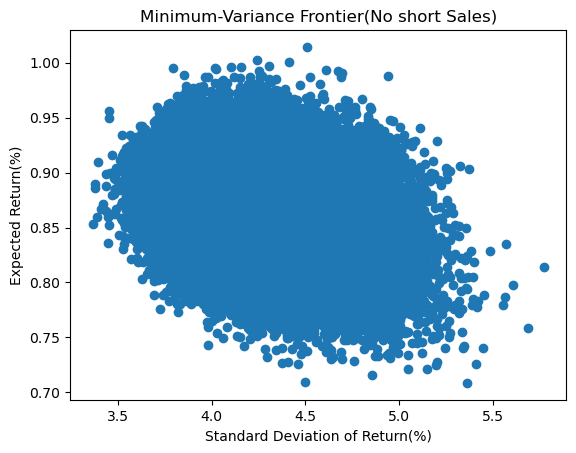

In [108]:
plt.scatter(lst_std, lst_mean)
plt.xlabel("Standard Deviation of Return(%)")
plt.ylabel("Expected Return(%)")
plt.title("Minimum-Variance Frontier(No short Sales)")
plt.show()

In [110]:
# plt.scatter(df_datapoints["std"], df_datapoints["return"])
# plt.show()

Repeat this entire process by simulating 1/w using the standard uniform distribution ⇒ take the reciprocal of the random draw from the standard uniform distribution as the portfolio weight.

## 2.2.Plot the new data points (on a separate graph) with mean return on the vertical axis vs standard deviation of return on the horizontal axis.


In [24]:
# df_datapoints1 = pd.DataFrame(columns=["return", "std"])
# for i in range(int(1e5)):
#     se_w = pd.Series(1/np.random.rand(10))
#     se_stand_w = se_w/sum(se_w)
#     se_stand_w.index = lst_industry_names
    
#     profolio_std = np.sqrt(se_stand_w.dot(df1[lst_industry_names].cov()).dot(se_stand_w))
    
#     profolio_return = se_stand_w.dot(df1[lst_industry_names].apply(np.mean))
#     df_datapoints1.loc[len(df_datapoints1)] = [profolio_return, profolio_std]

In [25]:
# df_datapoints1

return       std
0      0.884764  4.083773
1      0.868411  4.307771
2      0.879001  4.404314
3      0.900359  3.614840
4      0.880095  4.532471
...         ...       ...
99995  0.925300  3.919110
99996  0.651339  4.928453
99997  0.911717  4.077208
99998  0.907541  4.764562
99999  0.871590  3.954955

[100000 rows x 2 columns]

In [105]:
#improvement
num_rows = int(1e5)
num_cols = 10

#get 1e5*10 standarized w
random_matrix = 1/np.random.rand(num_rows, num_cols)
random_matrix = pd.DataFrame(random_matrix).T
random_matrix.index = lst_industry_names
w = random_matrix.apply(lambda x: x/np.sum(x))

cov = df1[lst_industry_names].cov()
R = df1[lst_industry_names].apply(np.mean)

lst_variance = []
lst_mean = []

for i in range(len(w.columns)):
    #var = w*cov*w
    lst_variance.append(w[i].dot(cov).dot(w[i]))
    #mean = w*R
    lst_mean.append(w[i].dot(R))
lst_std = np.sqrt(lst_variance)

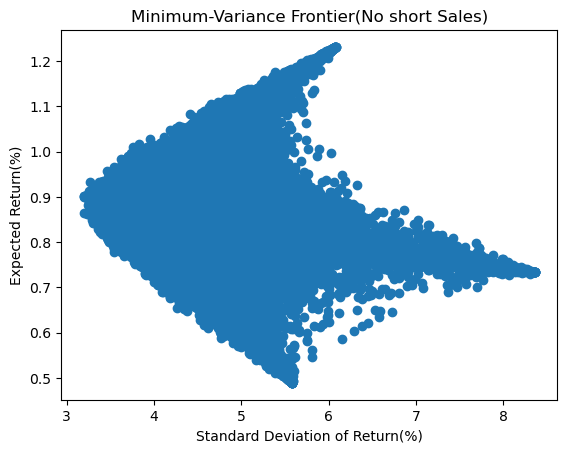

In [106]:
plt.scatter(lst_std, lst_mean)
plt.xlabel("Standard Deviation of Return(%)")
plt.ylabel("Expected Return(%)")
plt.title("Minimum-Variance Frontier(No short Sales)")
plt.show()

In [109]:
# plt.scatter(df_datapoints1["std"], df_datapoints1["return"])
# plt.show()